# Weak discriminator example

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For random number generation

from scipy.stats import norm
from scipy.stats import expon

### (1) Define generation procedure for normal and exponential distribution

In [2]:
# Normal distribution with correlation for signal

def mynorm(Nmc,pos,sig,corr=0.0):

    data = np.ones(shape=(Nmc,3))
    
    phi = 0.5*np.arcsin(corr)

    g = np.random.normal(size=(2,Nmc))

    data[:,0] = pos[0] + sig[0]*(g[0]*np.cos(phi) + g[1]*np.sin(phi))
    data[:,1] = pos[1] + sig[1]*(g[0]*np.sin(phi) + g[1]*np.cos(phi))
    
    return data

# Exponential distribution with correlation for background

def myexpo(Nmc,pos,sig,corr=0.0):

    data = np.ones(shape=(Nmc,3))
    
    phi = 0.5*np.arcsin(corr)

    g = np.random.normal(size=(2,Nmc))

    r1_tab = g[0]*np.cos(phi) + g[1]*np.sin(phi)
    r2_tab = g[0]*np.sin(phi) + g[1]*np.cos(phi)

# Convert correlated gaussian variables r1 & r2 
# to correlated exponential variables, based on survival function

    s1_tab = norm.sf(r1_tab)
    s2_tab = norm.sf(r2_tab)
    
    data[:,0] = pos[0] + sig[0]*expon.isf(s1_tab)
    data[:,1] = pos[1] + sig[1]*expon.isf(s2_tab)
    
    return data

### (2) Generating training and test data

In [3]:
# Sample size

Ntrain = 1000
Ntest = 1000

# Two hypothesis:

# H1: Exponential background

h1 = np.array([-1.,-1.])
sig1 = np.array([1.5,1.0])
corr1 = 0.0

# H2: Normal distribution

h2 = np.array([1.,1.])
sig2 = np.array([0.3,0.3])
corr2 = -0.7

# Fraction of first hypothesis

fh1 = 0.5

# Generate train sample 
# ---------------------

h1train = myexpo(Ntrain,h1,sig1,corr1)
h2train = mynorm(Ntrain,h2,sig2,corr2)

# Uniform distributed numbers

rtrain = np.random.uniform(size=Ntrain)

# Mix of two hypothesis

y_train = rtrain > fh1

y2_train = np.resize(np.repeat(y_train,3),(Ntrain,3))

X_train = y2_train * h1train + (1 - y2_train)*h2train

print("Train data defined, size: ",y_train.size)

# Generate test sample 
# --------------------

h1test = myexpo(Ntest,h1,sig1,corr1)
h2test = mynorm(Ntest,h2,sig2,corr2)

# Uniform distributed numbers

rtest = np.random.uniform(size=Ntest)

# Mix of two hypothesis

y_test = rtest > fh1

y2_test = np.resize(np.repeat(y_test,3),(Ntest,3))

X_test = y2_test * h1test + (1 - y2_test)*h2test

print("Test data defined, size: ",y_test.size)

# Rescale category from {0,1} to {-1,1}

y_train = 2*y_train - 1
y_test = 2*y_test - 1

Train data defined, size:  1000
Test data defined, size:  1000


### (3) Search for best random classifier

In [4]:
Ntry = 100

# Generate random weights and select best performing

nbest = 0
wbest = np.zeros(shape=3)

for itry in range(Ntry):
    wvec = np.random.uniform(size=3)-0.5
    ypred  = X_train @ wvec
    nok = np.sum(ypred*y_train > 0)

    if nok < Ntrain/2 :
        wvec *= -1
        nok = Ntrain - nok
    
    if nok > nbest:
        nbest = nok
        wbest = wvec
        

        
print(nok," events properly classified in training sample")

print("Final coefficients: ",wbest)
    
ai = -wbest[0]/wbest[1]
bi = -wbest[2]/wbest[1]

print("Discriminant line: y = ",ai," * x  +  ",bi)

# Check test sample

ypred2  = X_test @ wvec 
nok2 = np.sum(ypred2*y_test > 0)

print(nok2," events properly classified for test sample")


616  events properly classified in training sample
Final coefficients:  [-0.10243044 -0.32585728  0.2299348 ]
Discriminant line: y =  -0.3143414196723197  * x  +   0.7056303866818577
655  events properly classified for test sample


### (4) Plot results

In [5]:
# Create result graph

Xmin = -1.0
Xmax = 5.0
Np = 2

Xfun = np.linspace(Xmin,Xmax,Np)

# Discriminant line from the generated sample and from the distribution parameters

Yfun = ai*Xfun + bi

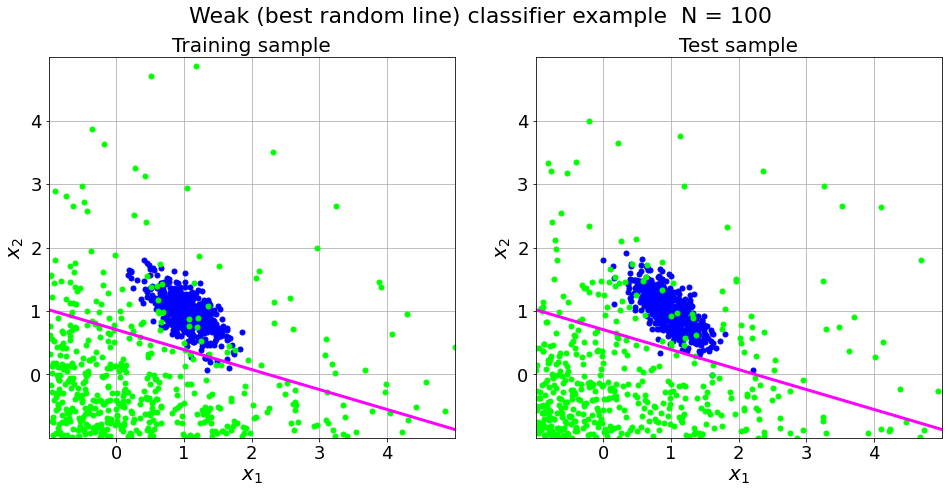

In [7]:
# Create result graph

Xmin = -0.999
Xmax = 4.999

plt.subplots(1,2,figsize=(16, 7))

plt.suptitle("Weak (best random line) classifier example  N = "+str(Ntry),fontsize=22)

# Train sample

plt.subplot(121)

# Training points in two categories

plt.plot(X_train[:,0][y_train==-1],X_train[:,1][y_train==-1],'o',color='blue',ms=5)
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],'o',color='lime',ms=5)
plt.plot(Xfun,Yfun,'-',color='magenta',linewidth=3)

plt.xlim([Xmin,Xmax])
plt.ylim([Xmin,Xmax])

plt.title("Training sample",size=20)
plt.xlabel('$x_1$',size=20)
plt.ylabel('$x_2$',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

# Test sample

plt.subplot(122)

# Test points in two categories

plt.plot(X_test[:,0][y_test==-1],X_test[:,1][y_test==-1],'o',color='blue',ms=5)
plt.plot(X_test[:,0][y_test==1],X_test[:,1][y_test==1],'o',color='lime',ms=5)
plt.plot(Xfun,Yfun,'-',color='magenta',linewidth=3)

plt.xlim([Xmin,Xmax])
plt.ylim([Xmin,Xmax])

plt.title("Test sample",size=20)
plt.xlabel('$x_1$',size=20)
plt.ylabel('$x_2$',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')


fname = '13_Weak.png'

plt.savefig(fname)

plt.show()